In [307]:
import tweepy
import pandas as pd
import numpy as np
import csv
pd.set_option("display.max_colwidth", None)
from collections import Counter
from pycorenlp import StanfordCoreNLP
stanford = StanfordCoreNLP('http://localhost:9000')
import matplotlib.pyplot as plt
import re
import datetime
import pickle 
import matplotlib.ticker as ticker
from more_itertools import chunked
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
import scipy.stats as st
import itertools
import collections
from nltk.corpus import stopwords

In [2]:
path=r'D:\华威Warwick\class\project\topic'   #load original tweets with topic ID
dems = pd.read_csv(path+'\dems_with_topics.csv')
dems = dems[['user_id','Time','Text','Topic']]
reps = pd.read_csv(path+'\\reps_with_topics.csv')
reps = reps[['user_id','Time','Text','Topic']]

In [3]:
reps_topics = np.load(r'D:\华威Warwick\class\project\topic\reps_topics.npy',allow_pickle=True).item() #load topics
dems_topics = np.load(r'D:\华威Warwick\class\project\topic\dems_topics.npy',allow_pickle=True).item()

In [5]:
top_topics_reps = []
top_topics_reps.append([i for i in reps_topics.values()][1:30]) #showing top topics
top_topics_dems = []
top_topics_dems.append([i for i in dems_topics.values()][1:30])

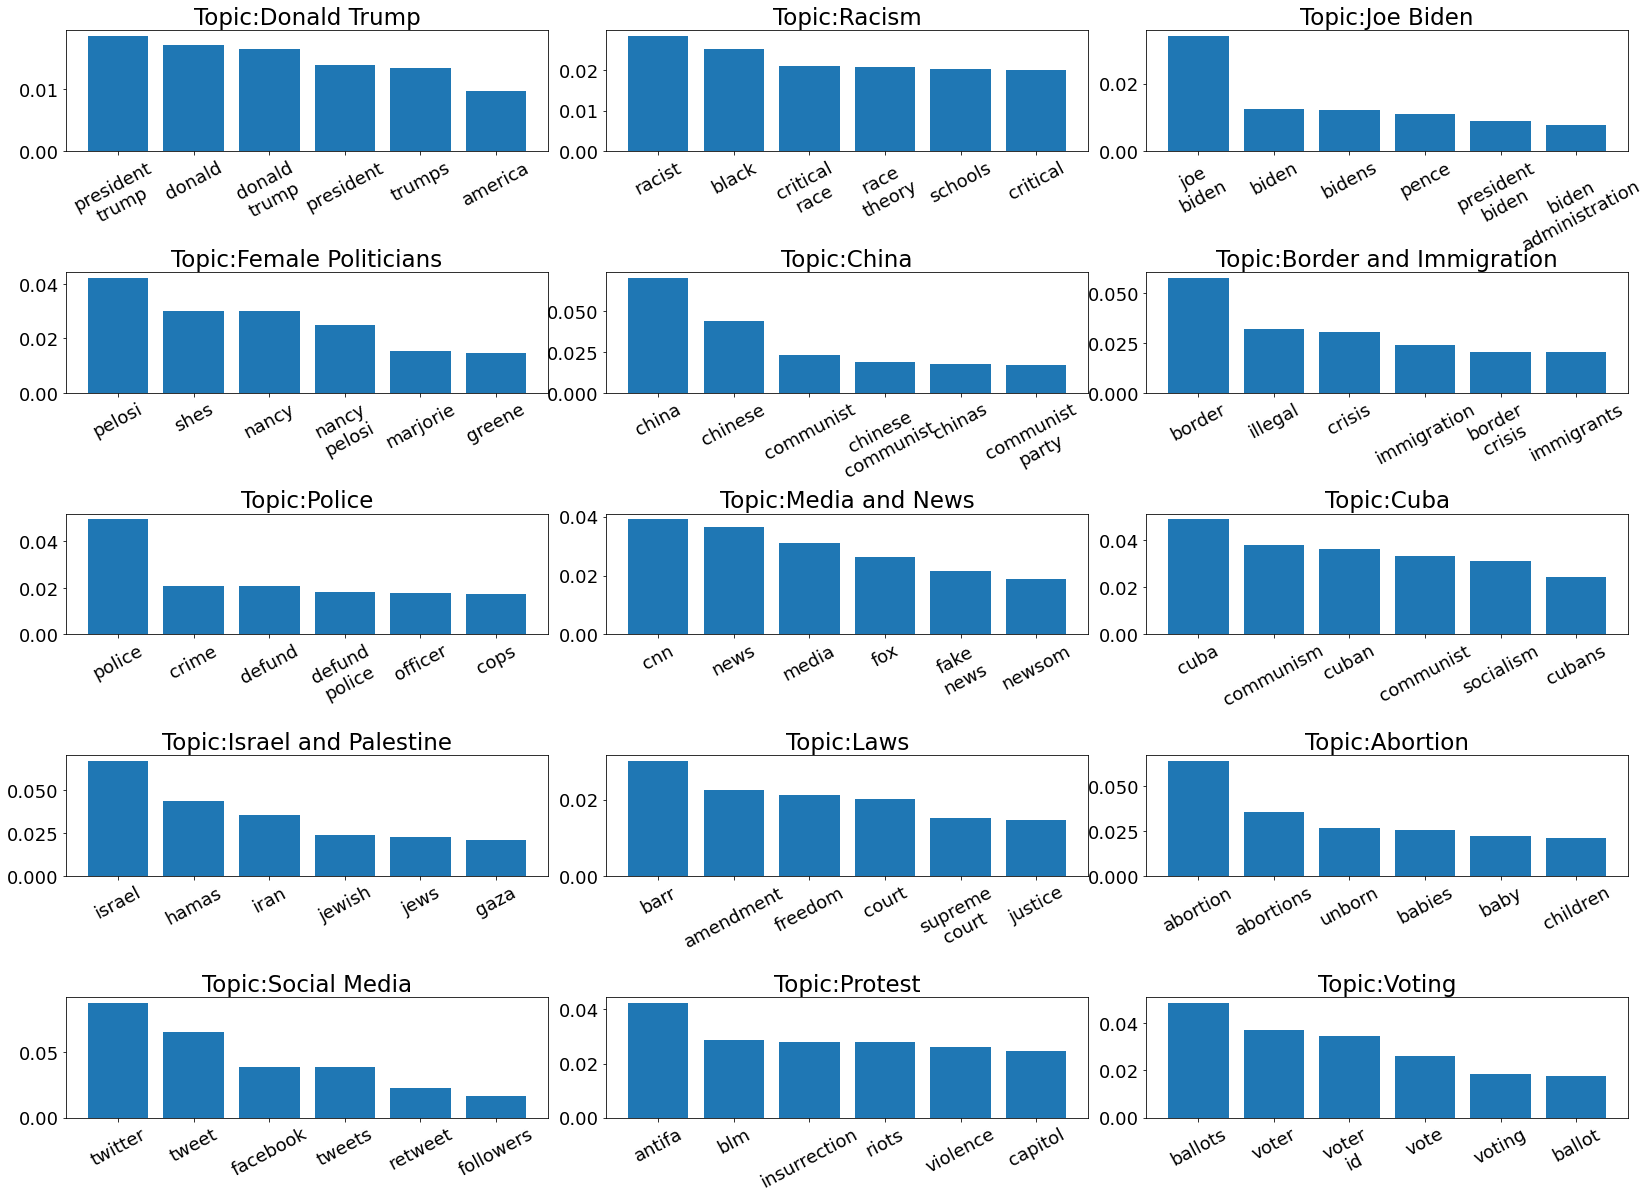

In [181]:
n= 1;list_count = 1 #showing top topics for reps
plt.figure(figsize=(28,20));plt.subplots_adjust(hspace=1,wspace=0.12)
plt.rcParams.update({'font.size': 18})
for item in top_topics_reps[0][0:19]:
    topic = topics_assign_reps[list_count]
    if (topic =='Partisan') or (topic =='Meaningless Words') or (topic =='Time') or (topic =='Religion'):
        list_count+=1
        continue
    else:
        data = []
        label = []
        new_label = []
        for i in item[0:6]:
            data.append(i[1])
            label.append(i[0])
        for j in label:
            j = j.replace(" ","\n")
            new_label.append(j)
        label = new_label
        plt.subplot(5, 3,n);plt.bar(label, data);plt.xticks(rotation=28); plt.title('Topic:'+ str(topic),fontsize=23)
        #plt.xlabel('Representative tokens');plt.ylabel('Score');
        n=n+1;list_count+=1
plt.savefig(r'D:\华威Warwick\class\project\plot\reps_topic.png')


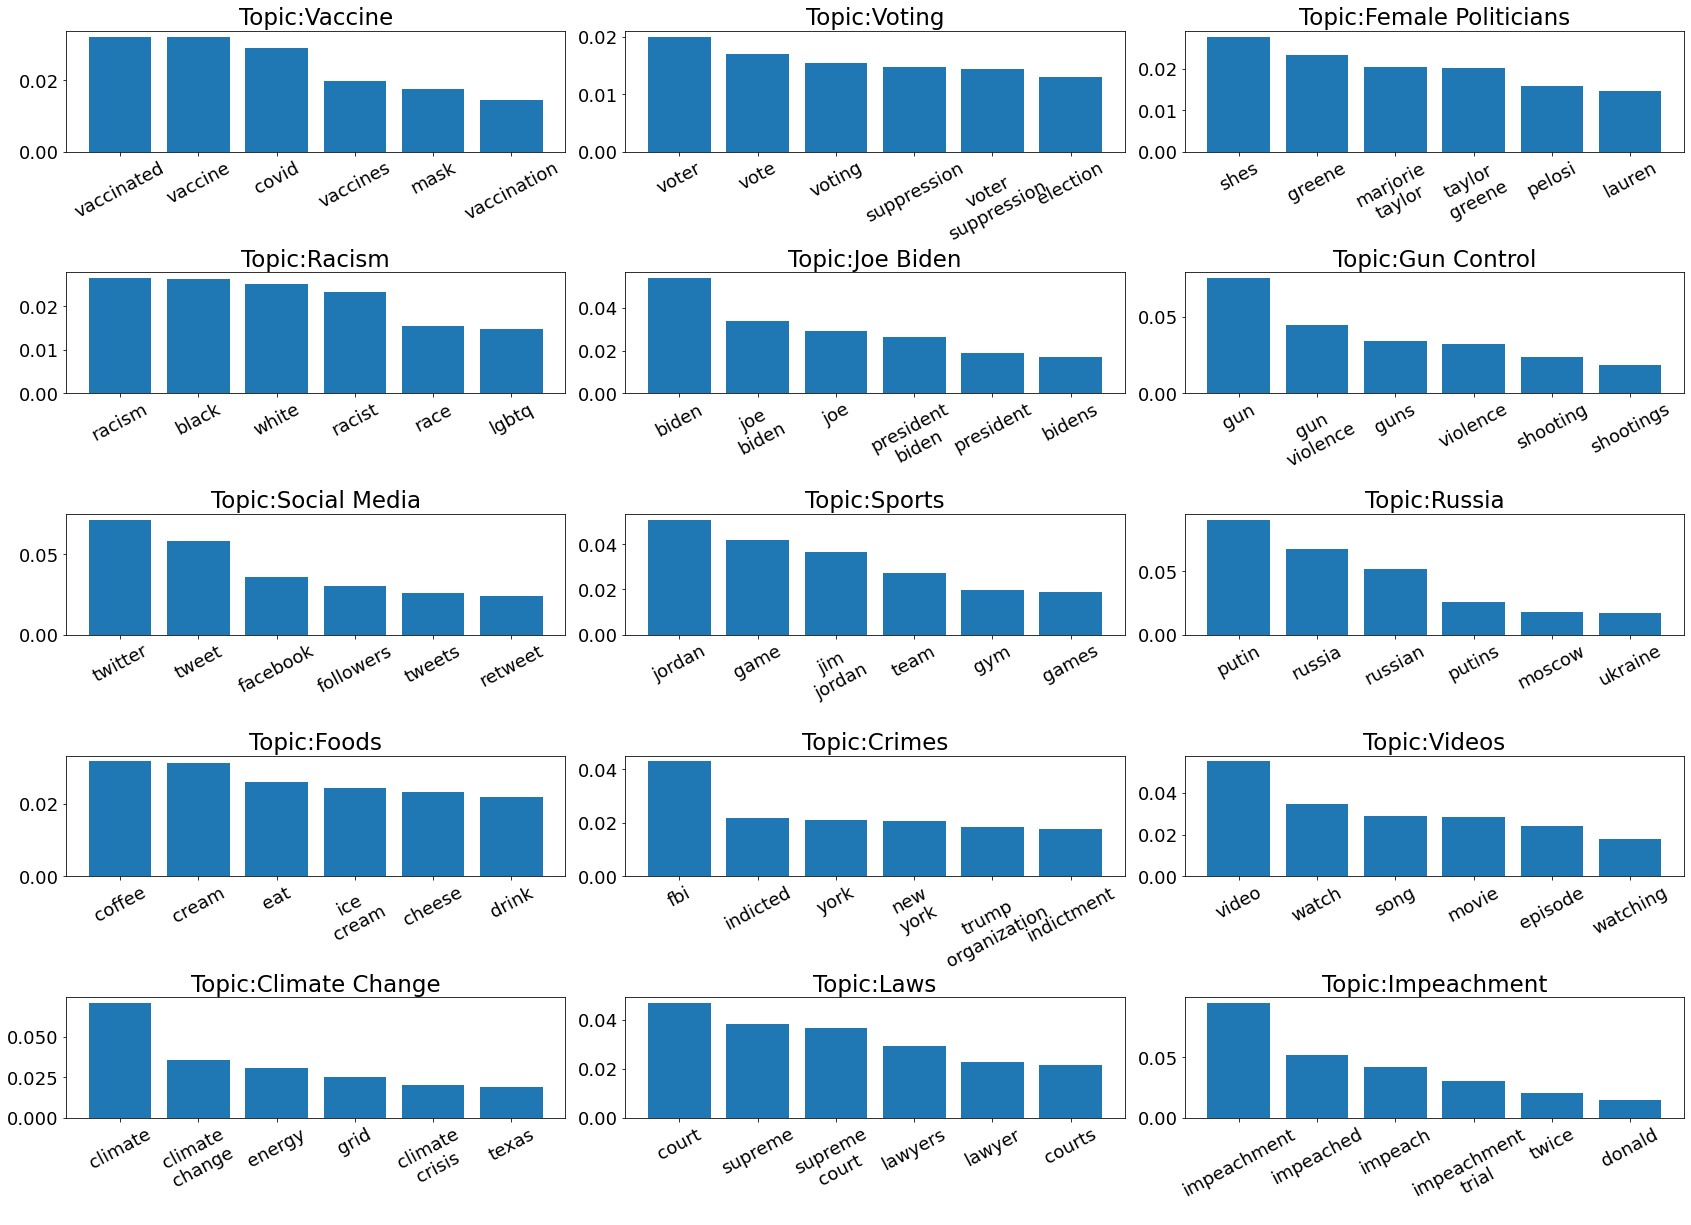

In [180]:
n= 1;list_count = 1  #showing top topics for dems
plt.figure(figsize=(29,20));plt.subplots_adjust(hspace=1,wspace=0.12)
plt.rcParams.update({'font.size': 18})
for item in top_topics_dems[0][0:18]:
    topic = topics_assign_dems[list_count]
    if (topic =='Bad Words') or (topic =='Partisan') or (topic =='Meaningless Tokens'):
        list_count+=1
        continue
    else:
        data = []
        label = []
        new_label = []
        for i in item[0:6]:
            data.append(i[1])
            label.append(i[0])
        for j in label:
            j = j.replace(" ","\n")
            new_label.append(j)
        label = new_label
        plt.subplot(5, 3,n);plt.bar(label, data);plt.xticks(rotation=28); plt.title('Topic:'+ str(topic),fontsize=23)
        #plt.xlabel('Representative tokens');plt.ylabel('Score');
        n=n+1 ; list_count+=1
plt.savefig(r'D:\华威Warwick\class\project\plot\dems_topic.png')


In [216]:
# function for calculating sentiment using Stanford CoreNLP
def calculate_sentiment(party_and_topic):
    sentiment = dict()
    sentiment_score = list()
    dates = set(party_and_topic['Time'])
    for date in dates:
      #  print(date)
        sentences = party_and_topic[party_and_topic['Time'] == date]['Text']
        for sentence in sentences:
            result = stanford.annotate(sentence,
                                       properties={
                                        'annotators': 'sentiment',
                                        'outputFormat': 'json',
                                        'timeout': '50000'
                                       })
            for s in result['sentences']:
                score = int(s['sentimentValue'])
                sentiment_score.append(score)
        ci = st.t.interval(alpha=0.95, df=len(sentiment_score)-1, loc=np.mean(sentiment_score), scale=st.sem(sentiment_score)) 
        sentiment[date] =  np.mean(sentiment_score),ci
        
    sentiment = sorted(sentiment.items(), 
                       key = lambda x:datetime.datetime.strptime(x[0], '%Y-%m-%d'), reverse=False)
    
    final = list()
    for i in sentiment:
        current = list()
        current.append(i[0]);current.append(i[1][0]);current.append(i[1][1][0]);current.append(i[1][1][1]);
        final.append(current)
    sentiment = final
    return sentiment

In [224]:
from pycorenlp import StanfordCoreNLP
stanford = StanfordCoreNLP('http://localhost:9000')

In [ ]:
reps_china = reps[reps['Topic']==4]
dems_china = dems[dems['Topic']==97]
reps_biden = reps[reps['Topic']==2]
dems_biden = dems[dems['Topic']==6]
reps_trump = reps[reps['Topic']==0]
dems_trump = dems[dems['Topic']==27]
reps_racism = reps[reps['Topic']==1]
dems_racism = dems[dems['Topic']==3]

# calculate sentiment for topic "China", "Racism", "Donald Trump","Joe Biden"
reps_biden_sentiment = calculate_sentiment(reps_biden)
with open(r'D:\华威Warwick\class\project\sentiment\reps_biden_sentiment', 'wb') as fp:
    pickle.dump(reps_biden_sentiment, fp)
dems_biden_sentiment = calculate_sentiment(dems_biden)
with open(r'D:\华威Warwick\class\project\sentiment\dems_biden_sentiment', 'wb') as fp:
    pickle.dump(dems_biden_sentiment, fp)
reps_trump_sentiment = calculate_sentiment(reps_trump)
with open(r'D:\华威Warwick\class\project\sentiment\reps_trump_sentiment', 'wb') as fp:
    pickle.dump(reps_trump_sentiment, fp)
dems_trump_sentiment = calculate_sentiment(dems_trump)
with open(r'D:\华威Warwick\class\project\sentiment\dems_trump_sentiment', 'wb') as fp:
    pickle.dump(dems_trump_sentiment, fp)
reps_racism_sentiment = calculate_sentiment(reps_racism)
with open(r'D:\华威Warwick\class\project\sentiment\reps_racism_sentiment', 'wb') as fp:
    pickle.dump(reps_racism_sentiment, fp)
dems_racism_sentiment = calculate_sentiment(dems_racism)
with open(r'D:\华威Warwick\class\project\sentiment\dems_racism_sentiment', 'wb') as fp:
    pickle.dump(dems_racism_sentiment, fp)
dems_china_sentiment = calculate_sentiment(dems_china)
with open(r'D:\华威Warwick\class\project\sentiment\dems_china_sentiment2', 'wb') as fp:
    pickle.dump(dems_china_sentiment, fp)
reps_china_sentiment = calculate_sentiment(reps_china)
with open(r'D:\华威Warwick\class\project\sentiment\reps_china_sentiment2', 'wb') as fp:
    pickle.dump(reps_china_sentiment, fp)
'''
with open (r'D:\华威Warwick\class\project\sentiment\reps_biden_sentiment', 'rb') as fp:
    reps_biden_sentiment = pickle.load(fp)
with open (r'D:\华威Warwick\class\project\sentiment\dems_biden_sentiment', 'rb') as fp:
    dems_biden_sentiment = pickle.load(fp)
with open (r'D:\华威Warwick\class\project\sentiment\reps_trump_sentiment', 'rb') as fp:
    reps_trump_sentiment = pickle.load(fp)
with open (r'D:\华威Warwick\class\project\sentiment\dems_trump_sentiment', 'rb') as fp:
    dems_trump_sentiment = pickle.load(fp)
with open (r'D:\华威Warwick\class\project\sentiment\reps_china_sentiment', 'rb') as fp:
    reps_china_sentiment = pickle.load(fp)
with open (r'D:\华威Warwick\class\project\sentiment\dems_china_sentiment', 'rb') as fp:
    dems_china_sentiment = pickle.load(fp) '''

In [295]:
# repeated measures ANOVA to explore sentiment difference over time
df = pd.DataFrame(reps_china_sentiment);df.columns =['date','sentiment','lower_ci','higher_ci']
df2 = pd.DataFrame(dems_china_sentiment);df2.columns =['date','sentiment','lower_ci','higher_ci']
df.insert(df.shape[1],'group','dems')
df['date'] = pd.to_datetime(df['date']).apply(lambda date: date.toordinal())
df2.insert(df2.shape[1],'group','reps')
df2['date'] = pd.to_datetime(df2['date']).apply(lambda date: date.toordinal())
df3 = [df, df2]
df3 = pd.concat(df3)
df3.reset_index(drop=True, inplace=True)
for i in df3['date']:
    if (df3.date == i).sum() != 2:
        df3=df3[~df3['date'].isin([i])]
#   print(df3)
print(AnovaRM(data=df3, depvar='sentiment', subject='date', within=['group'],aggregate_func='mean').fit()) 

                Anova
      F Value  Num DF  Den DF  Pr > F
-------------------------------------
group 374.4784 1.0000 249.0000 0.0000



In [398]:
# linear regressions to explore change in sentiment difference over time
four_topics = ['China','Racism','Donald Trump','Joe Biden']
for topic in four_topics:
    if topic == 'China':
        rep_sentiment = reps_china_sentiment; dem_sentiment = dems_china_sentiment
    if topic == 'Donald Trump':
        rep_sentiment = reps_trump_sentiment; dem_sentiment = dems_trump_sentiment
    if topic == 'Joe Biden':
        rep_sentiment = reps_biden_sentiment; dem_sentiment = dems_biden_sentiment
    if topic == 'Racism':
        rep_sentiment = reps_racism_sentiment; dem_sentiment = dems_racism_sentiment
    df = pd.DataFrame(rep_sentiment);df.columns =['date','sentiment','lower_ci','higher_ci']
    df2 = pd.DataFrame(dem_sentiment);df2.columns =['date','sentiment','lower_ci','higher_ci']
    for i, xi in enumerate(list(dates)): #deal with missing days
        if xi not in list(df["date"]):
            df.loc[df.shape[0]+1] = {'date':xi,'sentiment':None,'lower_ci':None,'lower_ci':None}
        if xi not in list(df2["date"]):
            df.loc[df2.shape[0]+1] ={'date':xi,'sentiment':None,'lower_ci':None,'lower_ci':None}
    df['date_ordinal'] = pd.to_datetime(df['date']).apply(lambda date: date.toordinal())
    df2['date_ordinal'] = pd.to_datetime(df2['date']).apply(lambda date: date.toordinal())
    df["sentiment"] = abs(df["sentiment"]-df2["sentiment"])
    
    mask = ~np.isnan(df['date_ordinal']) & ~np.isnan(df["sentiment"])
    print(str(topic),'sentiment difference (linear regression)')
    print(stats.linregress(df['date_ordinal'][mask],df["sentiment"][mask]))

China sentiment difference (linear regression)
LinregressResult(slope=-2.015625209584465e-05, intercept=14.93898670532725, rvalue=-0.048421727758118774, pvalue=0.44592568478736383, stderr=2.6401823556901633e-05)
Racism sentiment difference (linear regression)
LinregressResult(slope=1.0147181476779548e-05, intercept=-7.479318300278592, rvalue=0.05758100972603233, pvalue=0.34772305473704757, stderr=1.078708669909047e-05)
Donald Trump sentiment difference (linear regression)
LinregressResult(slope=6.954163782157536e-06, intercept=-4.863815868408268, rvalue=0.04520112210310342, pvalue=0.4611879135227286, stderr=9.423468083393165e-06)
Joe Biden sentiment difference (linear regression)
LinregressResult(slope=2.7729558017496385e-07, intercept=0.009470701815169125, rvalue=0.0016597842411411009, pvalue=0.9784239616357648, stderr=1.0243535904384776e-05)


In [396]:
# linear regressions to explore change in sentiment difference over time (24 topics by NLTK sentiment analysis)
for topic in selected_topics:
    reps_sentiment=[];dems_sentiment=[];combined_topics=[]

    if topic == 'Covid': #combine covid related topics
        combined_topics = ['Covid','Pandemic','Covid Relief','Coronavirus','Covid Deaths and Cases']
        reps_topic = pd.DataFrame(columns = ["user_id", "Time", "Text", "Topic"])
        dems_topic = pd.DataFrame(columns = ["user_id", "Time", "Text", "Topic"])
        for i in combined_topics:
            if i in topics_assign_reps:
                index_reps = topics_assign_reps.index(i)-1
                reps_topic = reps_topic.append(reps[reps['Topic']==index_reps])
            if i in topics_assign_dems:
                index_dems = topics_assign_dems.index(i)-1
                dems_topic = dems_topic.append(dems[dems['Topic']==index_dems])

    if  topic == 'Election':
        combined_topics = ['Voting','Election','Swing State','Election Fraud','Election Audit','Losing Election']
        reps_topic = pd.DataFrame(columns = ["user_id", "Time", "Text", "Topic"])
        dems_topic = pd.DataFrame(columns = ["user_id", "Time", "Text", "Topic"])
        for i in combined_topics:
            if i in topics_assign_reps:
                index_reps = topics_assign_reps.index(i)-1
                reps_topic = reps_topic.append(reps[reps['Topic']==index_reps])

            if i in topics_assign_dems:
                index_dems = topics_assign_dems.index(i)-1
                dems_topic = dems_topic.append(dems[dems['Topic']==index_dems])

    if (topic!='Covid') and (topic!='Election'):
        index_reps = topics_assign_reps.index(topic)-1
        index_dems = topics_assign_dems.index(topic)-1
        reps_topic = reps[reps['Topic']==index_reps]
        dems_topic = dems[dems['Topic']==index_dems]

    reps_sentiment = calculate_sentiment_nltk(reps_topic)
    dems_sentiment = calculate_sentiment_nltk(dems_topic)  
    df = pd.DataFrame(reps_sentiment);df.columns =['date','sentiment','lower_ci','higher_ci']
    df2 = pd.DataFrame(dems_sentiment);df2.columns =['date','sentiment','lower_ci','higher_ci']
    for i, xi in enumerate(list(dates)): #deal with missing days
        if xi not in list(df["date"]):
            df.loc[df.shape[0]+1] = {'date':xi,'sentiment':None,'lower_ci':None,'lower_ci':None}
        if xi not in list(df2["date"]):
            df.loc[df2.shape[0]+1] ={'date':xi,'sentiment':None,'lower_ci':None,'lower_ci':None}
    df['date_ordinal'] = pd.to_datetime(df['date']).apply(lambda date: date.toordinal())
    df2['date_ordinal'] = pd.to_datetime(df2['date']).apply(lambda date: date.toordinal())
    df["sentiment"] = abs(df["sentiment"]-df2["sentiment"])

    mask = ~np.isnan(df['date_ordinal']) & ~np.isnan(df["sentiment"])
    print(str(topic),'entiment difference (linear regression)')
    print(stats.linregress(df['date_ordinal'][mask],df["sentiment"][mask]))
    
 #   ax = sns.regplot(data=df,x= df['date_ordinal'][mask],y = df["sentiment"][mask])
    # Tighten up the axes for prettiness
 #   ax.set_xlim(df['date_ordinal'].min() - 1, df['date_ordinal'].max() + 1)
 #   ax.set_xlabel('date')
 #   new_labels = [datetime.datetime.fromordinal(int(item)).strftime('%Y-%m-%d') for item in ax.get_xticks()]
 #   ax.set_xticklabels(new_labels);plt.xticks(rotation=30);plt.show()


Covid entiment difference (linear regression)
LinregressResult(slope=-1.7907306759792415e-06, intercept=1.4740899012240525, rvalue=-0.007434727845254297, pvalue=0.903576577321713, stderr=1.4767683513450928e-05)
Election entiment difference (linear regression)
LinregressResult(slope=1.9087508326773197e-05, intercept=-14.020681019380437, rvalue=0.07598046396533566, pvalue=0.21503726830958916, stderr=1.535851583296579e-05)
Donald Trump entiment difference (linear regression)
LinregressResult(slope=3.774075879246913e-06, intercept=-2.525162171169935, rvalue=0.03504884844714182, pvalue=0.5678180002421247, stderr=6.598255726935327e-06)
Joe Biden entiment difference (linear regression)
LinregressResult(slope=1.0936932072204174e-05, intercept=-7.841961148741606, rvalue=0.04851695818238631, pvalue=0.42893800656152514, stderr=1.3805412494658013e-05)
China entiment difference (linear regression)
LinregressResult(slope=2.9190009578633117e-05, intercept=-21.52194828727062, rvalue=0.1234445600224284

D:\Anaconda\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Jeff Bezos entiment difference (linear regression)
LinregressResult(slope=2.6297374979469407e-05, intercept=-19.35453990118114, rvalue=0.08540729679493296, pvalue=0.18271733955379008, stderr=1.967997400683575e-05)
British Royal Family entiment difference (linear regression)
LinregressResult(slope=5.933027867610493e-06, intercept=-4.330811502180923, rvalue=0.014896297642586346, pvalue=0.8107060926688401, stderr=2.4745713165656095e-05)


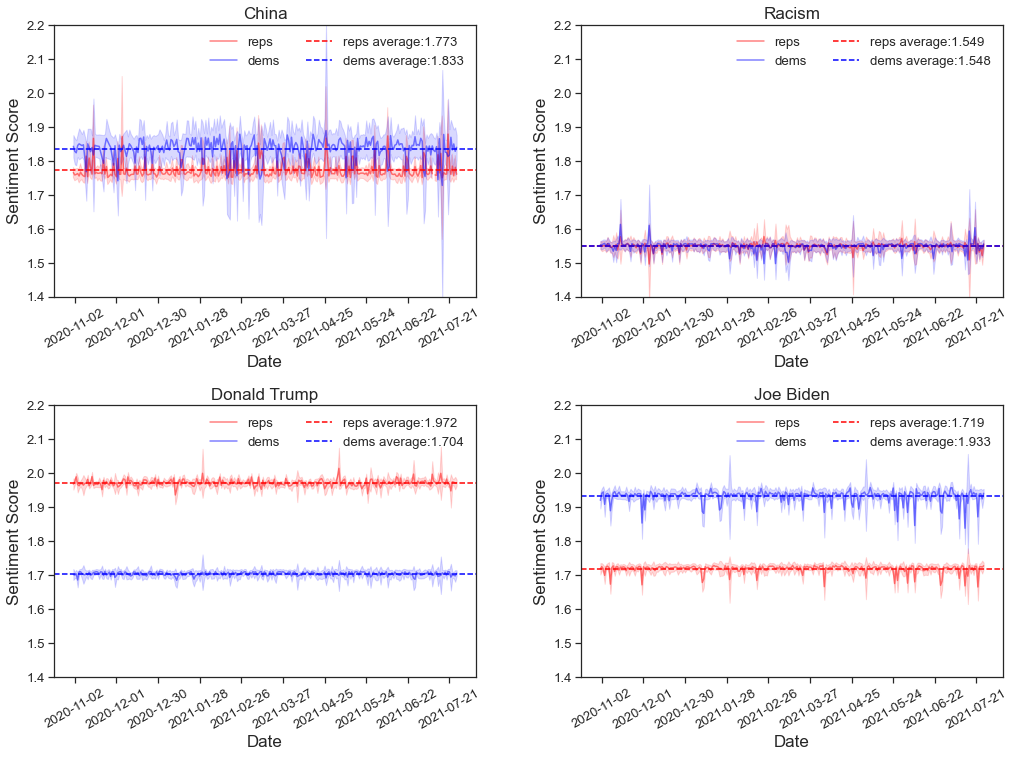

In [387]:
def plot_sentiment_Corenlp(reps_sentiment,dems_sentiment,topic,n):
    df = pd.DataFrame(reps_sentiment);df.columns =['date','sentiment','lower_ci','higher_ci']
    df2 = pd.DataFrame(dems_sentiment);df2.columns =['date','sentiment','lower_ci','higher_ci']
    for i, xi in enumerate(list(dates)): #deal with missing days
        if xi not in list(df["date"]):
            df.loc[df.shape[0]+1] = {'date':xi,'sentiment':None,'lower_ci':None,'lower_ci':None}
        if xi not in list(df2["date"]):
            df.loc[df2.shape[0]+1] ={'date':xi,'sentiment':None,'lower_ci':None,'lower_ci':None}

    df['date'] = pd.to_datetime(df['date']);df.sort_values(by = 'date');df.reset_index(inplace=True)
    df2['date'] = pd.to_datetime(df2['date']);df2.sort_values(by = 'date');df2.reset_index(inplace=True)
    plt.plot(df["date"],df["sentiment"],c="r",label='reps',alpha=0.5)
    #plt.plot(df["date"],df["sentiment"],c="r",alpha=0.5)
    plt.fill_between(df["date"],df["lower_ci"],df["higher_ci"],color='r',alpha=0.15)
    plt.plot(df2["date"],df2["sentiment"],c="b",label='dems',alpha=0.5)
    #plt.plot(df2["date"],df2["sentiment"],c="b",alpha=0.5)
    plt.fill_between(df2["date"],df2["lower_ci"],df2["higher_ci"],color='b',alpha=0.15)
    avg_reps=np.mean(df["sentiment"]); avg_dems=np.mean(df2["sentiment"])
    plt.axhline(y=avg_reps,color='r',linestyle='--',markeredgewidth=0.4 ,label = ('reps average:'+str('%.3f' % avg_reps)))
    plt.axhline(y=avg_dems,color='b',linestyle='--',markeredgewidth=0.4 ,label = ('dems average:'+str('%.3f' % avg_dems)))
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(29));plt.xticks(rotation=30)
    plt.xlabel('Date',fontsize=17);plt.ylabel('Sentiment Score',fontsize=17);plt.title(topic,fontsize=17)
    plt.legend(ncol=2,framealpha=0);plt.tick_params(bottom=True,left=True);plt.ylim((1.4, 2.2))
#    plt.show()

plt.figure(figsize=(17,12));plt.subplots_adjust(hspace=0.4,wspace=0.25)
plt.subplot(2,2,1)
plot_sentiment_Corenlp(reps_china_sentiment,dems_china_sentiment,'China',1)
plt.subplot(2,2,2)
plot_sentiment_Corenlp(reps_racism_sentiment,dems_racism_sentiment,'Racism',2)
plt.subplot(2,2,3)
plot_sentiment_Corenlp(reps_trump_sentiment,dems_trump_sentiment,'Donald Trump',3)
plt.subplot(2,2,4)
plot_sentiment_Corenlp(reps_biden_sentiment,dems_biden_sentiment,'Joe Biden',4)




overall daily and weekly average for NLTK sentiment analysis result (not Stanford CoreNLP)

In [ ]:
import scipy.stats as st
################## daily average ###############
sentiment_score = list()
demo2 = dict()
dates = set(reps['Time'])
for date in dates:
    sentences = reps[reps['Time'] == date]['Text']
    for sentence in sentences:
            analysis = sia.polarity_scores(sentence)['compound']
            sentiment_score.append(analysis)
    ci = st.t.interval(alpha=0.95, df=len(sentiment_score)-1, loc=np.mean(sentiment_score), scale=st.sem(sentiment_score)) 
    demo2[date] =  np.mean(sentiment_score),ci
reps_sentiment_all = sorted(demo2.items(), 
                      key = lambda x:datetime.datetime.strptime(x[0], '%Y-%m-%d'), reverse=False)
final = list()
for i in reps_sentiment_all:
    current = list()
    current.append(i[0]);current.append(i[1][0]);current.append(i[1][1][0]);current.append(i[1][1][1]);
    final.append(current)
reps_sentiment_all = final

sentiment_score = list()
demo = dict()
dates = set(dems['Time'])
for date in dates:
    sentences = dems[dems['Time'] == date]['Text']
    for sentence in sentences:
            analysis = sia.polarity_scores(sentence)['compound']
            sentiment_score.append(analysis)
    ci = st.t.interval(alpha=0.95, df=len(sentiment_score)-1, loc=np.mean(sentiment_score), scale=st.sem(sentiment_score))
    demo[date] =  np.mean(sentiment_score),ci
dems_sentiment_all = sorted(demo.items(), 
                      key = lambda x:datetime.datetime.strptime(x[0], '%Y-%m-%d'), reverse=False)
final = list()
for i in dems_sentiment_all:
    current = list()
    current.append(i[0]);current.append(i[1][0]);current.append(i[1][1][0]);current.append(i[1][1][1]);
    final.append(current)
dems_sentiment_all = final

In [ ]:
################## weekly average ###############
weekly_sentiment_dems = dict()
for x in chunked(dems_sentiment_all, 7):
    sum = 0
    daily_score = list()
    if len(x)==7:
        daily_score.append(x[0][1]);daily_score.append(x[1][1]);daily_score.append(x[2][1]);daily_score.append(x[4][1])
        daily_score.append(x[4][1]);daily_score.append(x[5][1]);daily_score.append(x[6][1])
        ave = np.mean(daily_score)
        period = str(x[0][0])+' - '+str(x[6][0])
        ci = st.t.interval(alpha=0.95, df=len(daily_score)-1, loc=np.mean(daily_score), scale=st.sem(daily_score))
        weekly_sentiment_dems[period] = ave,ci
final = list()
for i in weekly_sentiment_dems.items():
    current = list()
    current.append(i[0]);current.append(i[1][0]);current.append(i[1][1][0]);current.append(i[1][1][1]);
    final.append(current)
weekly_sentiment_dems = final

weekly_sentiment_reps = dict()
for x in chunked(reps_sentiment_all, 7):
    sum = 0
    daily_score = list()
    if len(x)==7:
        daily_score.append(x[0][1]);daily_score.append(x[1][1]);daily_score.append(x[2][1]);daily_score.append(x[4][1])
        daily_score.append(x[4][1]);daily_score.append(x[5][1]);daily_score.append(x[6][1])
        ave = np.mean(daily_score)
        period = str(x[0][0])+' - '+str(x[6][0])
        ci = st.t.interval(alpha=0.95, df=len(daily_score)-1, loc=np.mean(daily_score), scale=st.sem(daily_score))
        weekly_sentiment_reps[period] = ave,ci
final = list()
for i in weekly_sentiment_reps.items():
    current = list()
    current.append(i[0]);current.append(i[1][0]);current.append(i[1][1][0]);current.append(i[1][1][1]);
    final.append(current)
weekly_sentiment_reps = final

Text(0.5, 1.0, 'Weekly Sentiment Score')

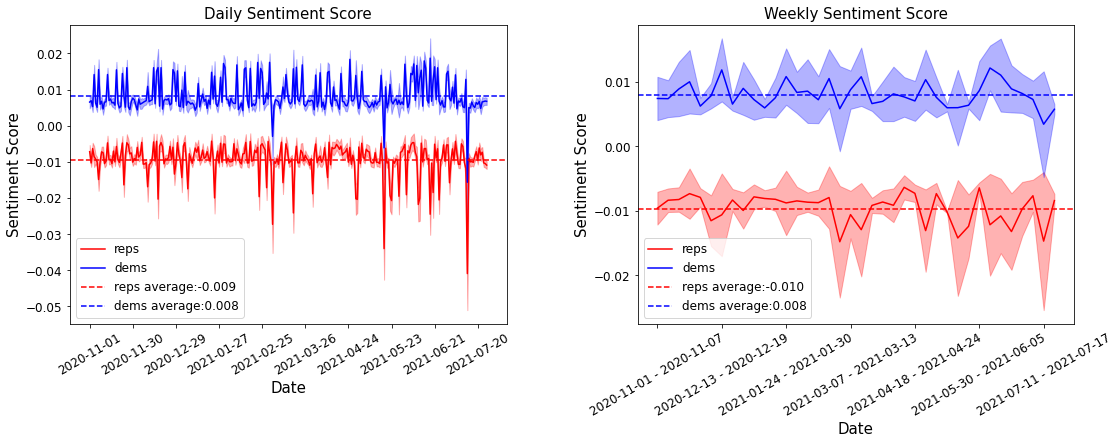

In [354]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(18,5.5));plt.subplots_adjust(hspace=0.5,wspace=0.3)
plt.subplot(1,2,1)
df = pd.DataFrame(reps_sentiment_all);df.columns =['date','sentiment','lower_ci','higher_ci']
df2 = pd.DataFrame(dems_sentiment_all);df2.columns =['date','sentiment','lower_ci','higher_ci']
plt.plot(df["date"],df["sentiment"],c="r",label='reps')
plt.fill_between(df["date"],df["lower_ci"],df["higher_ci"],color='r',alpha=0.3)
plt.plot(df2["date"],df2["sentiment"],c="b",label='dems')
plt.fill_between(df2["date"],df2["lower_ci"],df2["higher_ci"],color='b',alpha=0.3)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(29));plt.xticks(rotation=30)
avg_reps=np.mean(df["sentiment"]); avg_dems=np.mean(df2["sentiment"])
plt.axhline(y=avg_reps,color='r',linestyle='--',label = ('reps average:'+str('%.3f' % avg_reps)))
plt.axhline(y=avg_dems,color='b',linestyle='--',label = ('dems average:'+str('%.3f' % avg_dems)))
plt.xlabel('Date',fontsize=15);plt.ylabel('Sentiment Score',fontsize=15);plt.legend();plt.title('Daily Sentiment Score',fontsize=15)


plt.subplot(1,2,2)
df = pd.DataFrame(weekly_sentiment_reps,columns=['date','sentiment','lower_ci','higher_ci'])
df2 = pd.DataFrame(weekly_sentiment_dems,columns=['date','sentiment','lower_ci','higher_ci'])
#df.plot.scatter(x='date',y='sentiment')
#plt.scatter(df["date"],df["sentiment"],c="r",alpha=0.3,label='reps') 
#plt.scatter(df2["date"],df2["sentiment"],c="b",alpha=0.3,label='dems')
plt.plot(df["date"],df["sentiment"],c="r",label='reps')
plt.fill_between(df["date"],df["lower_ci"],df["higher_ci"],color='r',alpha=0.3)
plt.plot(df2["date"],df2["sentiment"],c="b",label='dems')
plt.fill_between(df2["date"],df2["lower_ci"],df2["higher_ci"],color='b',alpha=0.3)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(6));plt.xticks(rotation=30)
avg_reps=np.mean(df["sentiment"]); avg_dems=np.mean(df2["sentiment"])
plt.axhline(y=avg_reps,color='r',linestyle='--',label = ('reps average:'+str('%.3f' % avg_reps)))
plt.axhline(y=avg_dems,color='b',linestyle='--',label = ('dems average:'+str('%.3f' % avg_dems)))
plt.xlabel('Date',fontsize=15);plt.ylabel('Sentiment Score',fontsize=15);plt.legend();plt.title('Weekly Sentiment Score',fontsize=15)

In [106]:
#repeated mesures ANOVA for sentiment difference between two groups
import seaborn as sns
from scipy import stats
from statsmodels.stats.anova import AnovaRM
import pymannkendall as mk

df = pd.DataFrame(weekly_sentiment_dems,columns=['date','sentiment','lower_ci','higher_ci'])
df.insert(df.shape[1],'group','dems')
df['date'] = pd.to_datetime(df['date']).apply(lambda date: date.toordinal())
df2 = pd.DataFrame(weekly_sentiment_reps,columns=['date','sentiment','lower_ci','higher_ci'])
df2.insert(df2.shape[1],'group','reps')
df2['date'] = pd.to_datetime(df2['date']).apply(lambda date: date.toordinal())


df3 = [df, df2]
df3 = pd.concat(df3)
df3.reset_index(drop=True, inplace=True)

print(AnovaRM(data=df3, depvar='sentiment', subject='date', within=['group']).fit())

NameError: name 'weekly_sentiment_dems' is not defined

In [6]:
# function for calculating sentiment by NLTK tool
def calculate_sentiment_nltk(party_and_topic):
    sentiment = dict()
    sentiment_score = list()
    dates = set(party_and_topic['Time'])
    for date in dates:
      #  print(date)
        sentences = party_and_topic[party_and_topic['Time'] == date]['Text']
        for sentence in sentences:
            analysis = sia.polarity_scores(sentence)['compound']
            sentiment_score.append(analysis)
        ci = st.t.interval(alpha=0.95, df=len(sentiment_score)-1, loc=np.mean(sentiment_score), scale=st.sem(sentiment_score)) 
        sentiment[date] =  np.mean(sentiment_score),ci
    sentiment = sorted(sentiment.items(), 
                       key = lambda x:datetime.datetime.strptime(x[0], '%Y-%m-%d'), reverse=False)
    
    final = list()
    for i in sentiment:
        current = list()
        current.append(i[0]);current.append(i[1][0]);current.append(i[1][1][0]);current.append(i[1][1][1]);
        final.append(current)
    sentiment = final
    
    return sentiment

In [12]:
#assign topics for every topic index giving by BERTopic
topics_assign_reps = ['None','Donald Trump','Racism','Joe Biden','Female Politicians','China','Border and Immigration','Religion','Police',
                      'Partisan','Media and News','Cuba','Meaningless Words','Israel and Palestine','Laws','Time','Abortion',
                     'Social Media','Protest','Voting','Health','Vaccine','FBI','Videos','Sports','Food','Money','Cuomo',
                     'Swing State','Impeachment','Hunter Biden','Russia','Fauci','Meaningless Tokens','Election Fraud','Resignation','Mask',
                      'Gun Control','Climate Change','Kamala Harris','Nigeria','Election Audit','Happy Expressions','Lies','Tax','Energy',
                      'Animals','Tech Censorship','Appreciation','Holidays','Job Market','Patriotism','Female','Memorial','Agreement',
                      'Coronavirus','Space','Covid','Hilariousness','Bad Words','Republicans','Dresses','Books','Fighting','Vehicles',
                      'Islamic Terrorism','Science','Olympics','George Floyd','Vaccine Passport','Hate','Covid Deaths and Cases','Jen Psaki',
                      'Not Known','Corruption','Dominion Voting','Oil Pipeline','Homeless People','Communication Methods','Nashville Explosion',
                      'Whitehouse','Economy','Rush Limbaugh','Jeff Bezos','Pictures','Some Republicans','Filibuster','Houseworks','Natural Sceneries',
                     'Politicians','Not Known 2','Music','Sexual Crime','Government','Danger','Covid Relief','Ashli Babbitt','Treason',
                      'Ted Cruz','Left and Right','Lincoln','British Royal Family','Lebron James','Death','Not Known 3','Some Democrates',
                     'Thread','Jeffrey Epstein','Michael Flynn and Sidney Powell','CDC','Followers','Conspiracy','Pandemic',
                      'Rudy Giuliani','Clowns','Afghanistan','Lawsuit','Zuckerberg','Some Celebrities','Rescue Plan','Not Known 4',
                      'Love','Ilhan Omar','Matt Gaetz','Stacey Abrams','Interview','John Kerry','Disease','Donations','Accounts','Not Known 5',
                     ]
topics_assign_dems = ['None','Vaccine','Voting','Female Politicians','Racism','Bad Words','Partisan','Joe Biden','Gun Control','Social Media',
                      'Sports','Russia','Foods','Crimes','Videos','Climate Change','Meaningless Tokens','Laws','Impeachment',
                      'Some Politicians','Donation','Media and News','Time','Police','Religion','Tax','Health Care','Family','Donald Trump',
                      'Fascism','School','Terrorism','Appreciation','Animals','Matt Gaetz','Job Market','Israel and Palestine','Vehicles',
                     'Texas Election','Lies','Some Republicans','Border and Immigration','Swing State','George Floyd','Crime','Afghanistan',
                      'Books','Mitch Mcconnell','Merrick Garland','Rescue Plan','Birthday','Some Republicans','Senate Committee','Filibuster',
                      'Ivanka and Kushner','Abortion','Joe Manchin','Treason','agreement','Josh Hawley','John Lewis Voting Rights Act',
                      'Pardon','William Barr','Tucker Carlson','Space','Michael Flynn','Holidays','Patriotism','Sexual Crime','Disease',
                     'America','President','Thread','Covid Relief','Not Known','Not Known 2','Murder','Louis Dejoy','Weisselberg','Hilariousness',
                      'Pictures','Bad Words 2','Rudy Giuliani','Lindsey Graham','Jeff Bezos','Twitter','Brett Kavanaugh','Dresses','Resignation',
                      'Drugs','Sleep','Mike Pence','Pandemic','Mental Health','Business','Civil Rights','British Royal Family','Subpoena','China',
                      'Budget Committee','Shops','Love','Not Known 3','Kamala Harris','Jen Psaki','Hope','Student Loan','Greg Abbott','Paul Gosar',
                      'Stacey Abrams','Infrastructure','Cancel Culture','Accountability','Rand Pual and Fauci','Science','Socialism','Amendment',
                      'Illness','Cuba','Law and Order','Unity','Fighting','Adam Kinzinger','Losing Election','History','Ku Klux Klan','Fauci',
                      'Phone','Not Known 4','Cuomo and Al Franken','Jeffrey Epstein','Big cities','Not Known 5','Eric Swalwell and Mo Brooks',
                      'Not Known 6'
                     ]

In [161]:
commom_topics = list()
for i in topics_assign_reps:
    if i in topics_assign_dems:
        commom_topics.append(i)
commom_topics.remove('None');commom_topics.remove('Time');commom_topics.remove('Meaningless Tokens');commom_topics.remove('Holidays');
commom_topics.remove('Appreciation');commom_topics.remove('Hilariousness');commom_topics.remove('Bad Words');
commom_topics.remove('Love');commom_topics.remove('Not Known');commom_topics.remove('Not Known 2');
commom_topics.remove('Not Known 3');commom_topics.remove('Not Known 4');commom_topics.remove('Not Known 5');

In [1019]:
'Voting','Swing State'
'Covid','Covid Relief','Pandemic'  #topics that needed to be comnibed

('Covid', 'Covid Relief', 'Pandemic')

In [7]:
def dateRange(beginDate, endDate):
    dates = []
    dt = datetime.datetime.strptime(beginDate, "%Y-%m-%d")
    date = beginDate[:]
    while date <= endDate:
        dates.append(date)
        dt = dt + datetime.timedelta(1)
        date = dt.strftime("%Y-%m-%d")
    return dates

dates = dateRange('2020-11-01', '2021-07-26')

In [8]:
selected_topics_1 = ['Covid','Election','Donald Trump','Joe Biden','China','Racism','Border and Immigration','Police','Media and News','Cuba','Israel and Palestine',
                  'Vaccine']

In [9]:
    selected_topics_2 = [ 'Abortion', 'Impeachment', 'Russia','Fauci', 'Gun Control','Climate Change','Kamala Harris','George Floyd','Space', 'Sports','Jeff Bezos','British Royal Family']

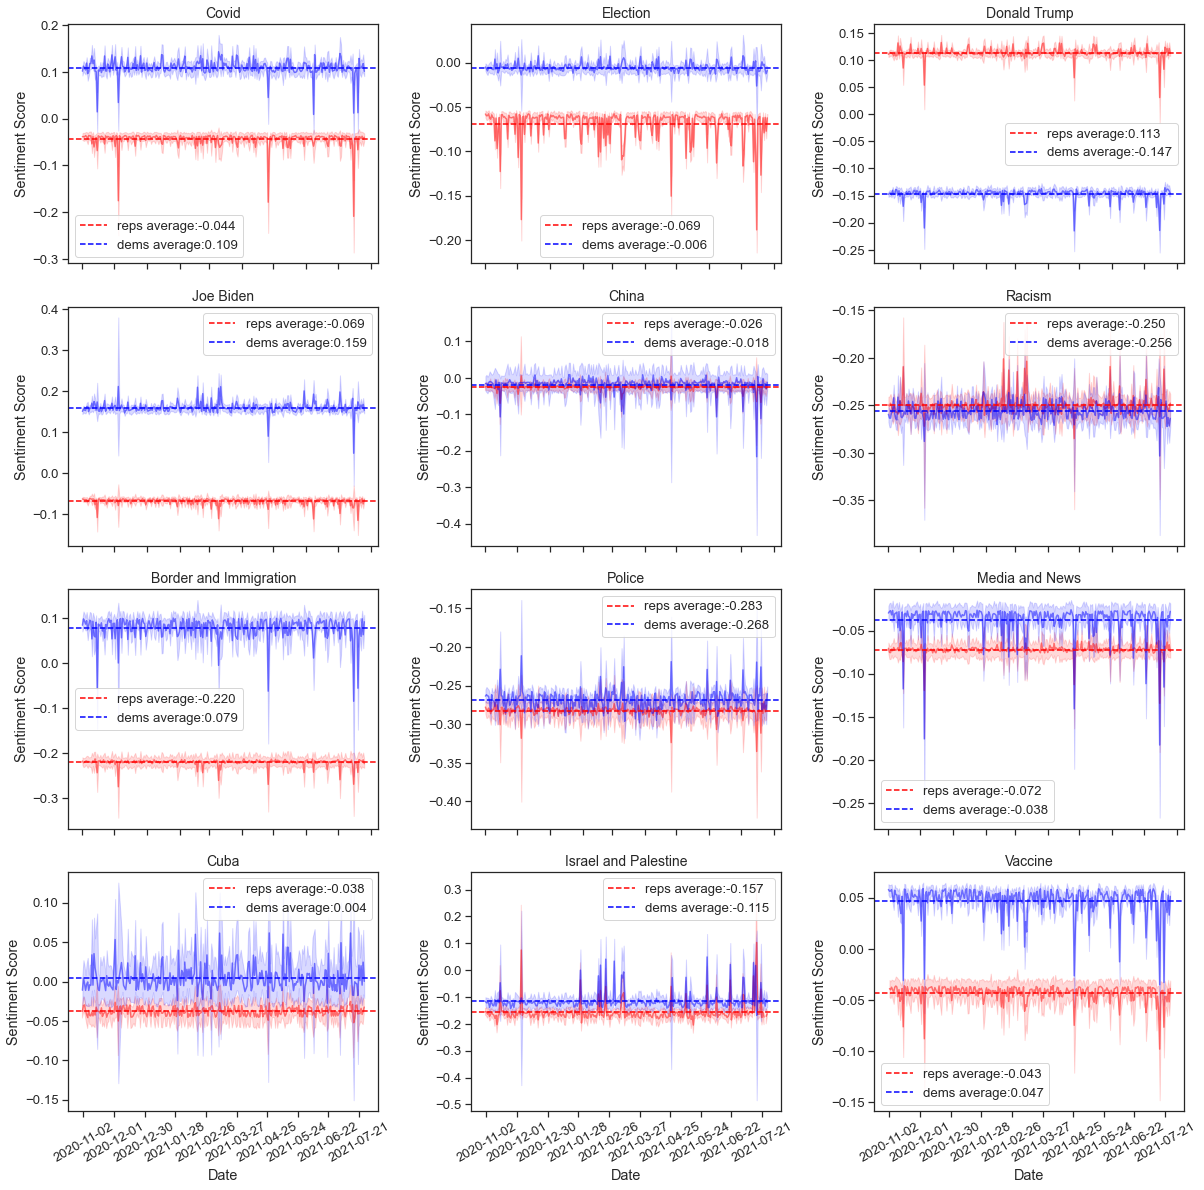

In [250]:
def plot_sentiment(selected_topics):
    plt.rcParams.update({'font.size': 13})
    fig = plt.figure(figsize=(20,20));plt.subplots_adjust(hspace=0.18,wspace=0.3)
    n=1
    for topic in selected_topics:
        reps_sentiment=[];dems_sentiment=[];combined_topics=[]
        
        if topic == 'Covid': #combine covid related topics
            combined_topics = ['Covid','Pandemic','Covid Relief','Coronavirus','Covid Deaths and Cases']
            reps_topic = pd.DataFrame(columns = ["user_id", "Time", "Text", "Topic"])
            dems_topic = pd.DataFrame(columns = ["user_id", "Time", "Text", "Topic"])
            for i in combined_topics:
                if i in topics_assign_reps:
                    index_reps = topics_assign_reps.index(i)-1
                    reps_topic = reps_topic.append(reps[reps['Topic']==index_reps])
                if i in topics_assign_dems:
                    index_dems = topics_assign_dems.index(i)-1
                    dems_topic = dems_topic.append(dems[dems['Topic']==index_dems])
        
        if  topic == 'Election':
            combined_topics = ['Voting','Election','Swing State','Election Fraud','Election Audit','Losing Election']
            reps_topic = pd.DataFrame(columns = ["user_id", "Time", "Text", "Topic"])
            dems_topic = pd.DataFrame(columns = ["user_id", "Time", "Text", "Topic"])
            for i in combined_topics:
                if i in topics_assign_reps:
                    index_reps = topics_assign_reps.index(i)-1
                    reps_topic = reps_topic.append(reps[reps['Topic']==index_reps])
                
                if i in topics_assign_dems:
                    index_dems = topics_assign_dems.index(i)-1
                    dems_topic = dems_topic.append(dems[dems['Topic']==index_dems])
                    
        if (topic!='Covid') and (topic!='Election'):
            index_reps = topics_assign_reps.index(topic)-1
            index_dems = topics_assign_dems.index(topic)-1
            reps_topic = reps[reps['Topic']==index_reps]
            dems_topic = dems[dems['Topic']==index_dems]
            
        reps_sentiment = calculate_sentiment_nltk(reps_topic)
        dems_sentiment = calculate_sentiment_nltk(dems_topic)  
        df = pd.DataFrame(reps_sentiment);df.columns =['date','sentiment','lower_ci','higher_ci']
        df2 = pd.DataFrame(dems_sentiment);df2.columns =['date','sentiment','lower_ci','higher_ci']
        for i, xi in enumerate(list(dates)): #deal with missing days
            if xi not in list(df["date"]):
                df.loc[df.shape[0]+1] = {'date':xi,'sentiment':None,'lower_ci':None,'lower_ci':None}
            if xi not in list(df2["date"]):
                df.loc[df2.shape[0]+1] ={'date':xi,'sentiment':None,'lower_ci':None,'lower_ci':None}

        df['date'] = pd.to_datetime(df['date']);df.sort_values(by = 'date');df.reset_index(inplace=True)
        df2['date'] = pd.to_datetime(df2['date']);df2.sort_values(by = 'date');df2.reset_index(inplace=True)
        plt.subplot(4,3,n)
     #   plt.plot(df["date"],df["sentiment"],c="r",label='reps',alpha=0.5)
        plt.plot(df["date"],df["sentiment"],c="r",alpha=0.5)
        plt.fill_between(df["date"],df["lower_ci"],df["higher_ci"],color='r',alpha=0.15)
     #   plt.plot(df2["date"],df2["sentiment"],c="b",label='dems',alpha=0.5)
        plt.plot(df2["date"],df2["sentiment"],c="b",alpha=0.5)
        plt.fill_between(df2["date"],df2["lower_ci"],df2["higher_ci"],color='b',alpha=0.15)
        avg_reps=np.mean(df["sentiment"]); avg_dems=np.mean(df2["sentiment"])
        plt.axhline(y=avg_reps,color='r',linestyle='--',markeredgewidth=0.4 ,label = ('reps average:'+str('%.3f' % avg_reps)))
        plt.axhline(y=avg_dems,color='b',linestyle='--',markeredgewidth=0.4 ,label = ('dems average:'+str('%.3f' % avg_dems)))
        if n<10:
            plt.gca().xaxis.set_ticklabels([]);plt.tick_params(bottom=True,left=True) 
            plt.ylabel('Sentiment Score');plt.title(topic,fontsize=14);plt.legend();
        else:
            plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(29));plt.xticks(rotation=30);plt.tick_params(bottom=True,left=True) 
     #   plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(29));plt.xticks(rotation=30)
            plt.xlabel('Date');plt.ylabel('Sentiment Score');plt.title(topic,fontsize=14);plt.legend();
        n+=1

#plot_sentiment(selected_topics_2)
plot_sentiment(selected_topics_1)
        

D:\Anaconda\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


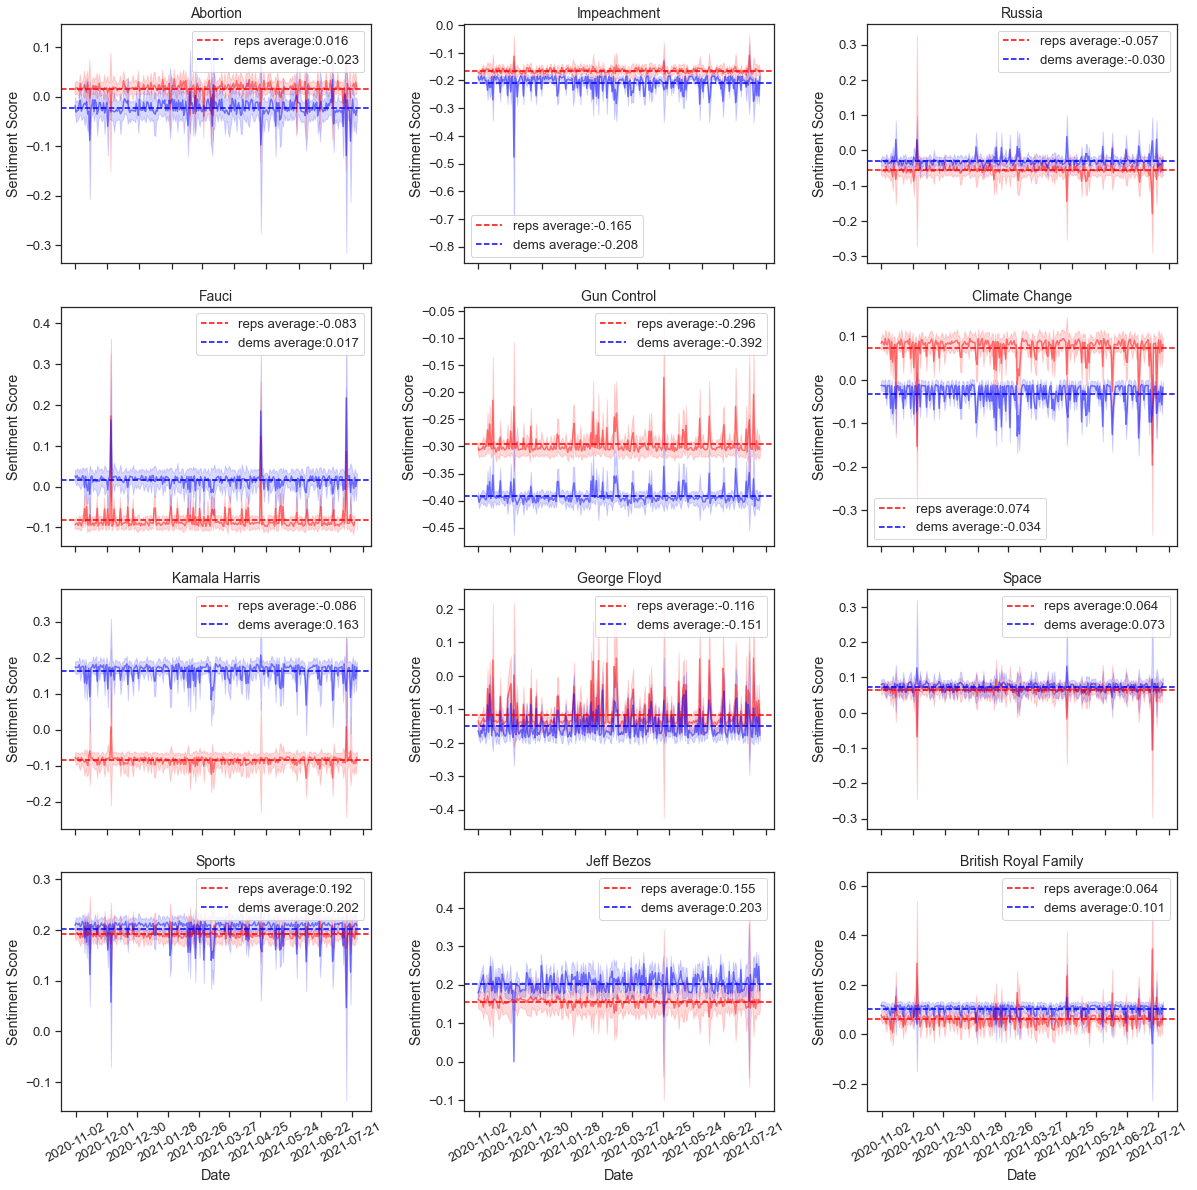

In [251]:
plot_sentiment(selected_topics_2)

In [16]:
selected_topics = ['Covid','Election','Donald Trump','Joe Biden','China','Racism','Border and Immigration','Police','Media and News','Cuba','Israel and Palestine',
                  'Vaccine', 'Abortion', 'Impeachment', 'Russia','Fauci', 'Gun Control','Climate Change','Kamala Harris','George Floyd','Space', 'Sports','Jeff Bezos','British Royal Family']

In [17]:
#calculate sentiment difference in sentiment
def sentiment_differnece(selected_topics):
    difference = dict()
    plt.rcParams.update({'font.size': 13})
   # fig = plt.figure(figsize=(20,20));plt.subplots_adjust(hspace=0.2,wspace=0.3)
    n=1
    for topic in selected_topics:
        reps_sentiment=[];dems_sentiment=[];combined_topics=[]
        
        if topic == 'Covid': #combine covid related topics
            combined_topics = ['Covid','Pandemic','Covid Relief','Coronavirus','Covid Deaths and Cases']
            reps_topic = pd.DataFrame(columns = ["user_id", "Time", "Text", "Topic"])
            dems_topic = pd.DataFrame(columns = ["user_id", "Time", "Text", "Topic"])
            for i in combined_topics:
                if i in topics_assign_reps:
                    index_reps = topics_assign_reps.index(i)-1
                    reps_topic = reps_topic.append(reps[reps['Topic']==index_reps])
                if i in topics_assign_dems:
                    index_dems = topics_assign_dems.index(i)-1
                    dems_topic = dems_topic.append(dems[dems['Topic']==index_dems])
        
        if  topic == 'Election':
            combined_topics = ['Voting','Election','Swing State','Election Fraud','Election Audit','Losing Election']
            reps_topic = pd.DataFrame(columns = ["user_id", "Time", "Text", "Topic"])
            dems_topic = pd.DataFrame(columns = ["user_id", "Time", "Text", "Topic"])
            for i in combined_topics:
                if i in topics_assign_reps:
                    index_reps = topics_assign_reps.index(i)-1
                    reps_topic = reps_topic.append(reps[reps['Topic']==index_reps])
                
                if i in topics_assign_dems:
                    index_dems = topics_assign_dems.index(i)-1
                    dems_topic = dems_topic.append(dems[dems['Topic']==index_dems])
                    
        if (topic!='Covid') and (topic!='Election'):
            index_reps = topics_assign_reps.index(topic)-1
            index_dems = topics_assign_dems.index(topic)-1
            reps_topic = reps[reps['Topic']==index_reps]
            dems_topic = dems[dems['Topic']==index_dems]
            
        reps_sentiment = calculate_sentiment_nltk(reps_topic)
        dems_sentiment = calculate_sentiment_nltk(dems_topic)  
        df = pd.DataFrame(reps_sentiment);df.columns =['date','sentiment','lower_ci','higher_ci']
        df2 = pd.DataFrame(dems_sentiment);df2.columns =['date','sentiment','lower_ci','higher_ci']
        for i, xi in enumerate(list(dates)): #deal with missing days
            if xi not in list(df["date"]):
                df.loc[df.shape[0]+1] = {'date':xi,'sentiment':None,'lower_ci':None,'lower_ci':None}
            if xi not in list(df2["date"]):
                df.loc[df2.shape[0]+1] ={'date':xi,'sentiment':None,'lower_ci':None,'lower_ci':None}

        df['date'] = pd.to_datetime(df['date']);df.sort_values(by = 'date');df.reset_index(inplace=True)
        df2['date'] = pd.to_datetime(df2['date']);df2.sort_values(by = 'date');df2.reset_index(inplace=True)
        
        difference[topic] = df['sentiment']- df2['sentiment']
    return difference
difference = sentiment_differnece(selected_topics)

D:\Anaconda\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


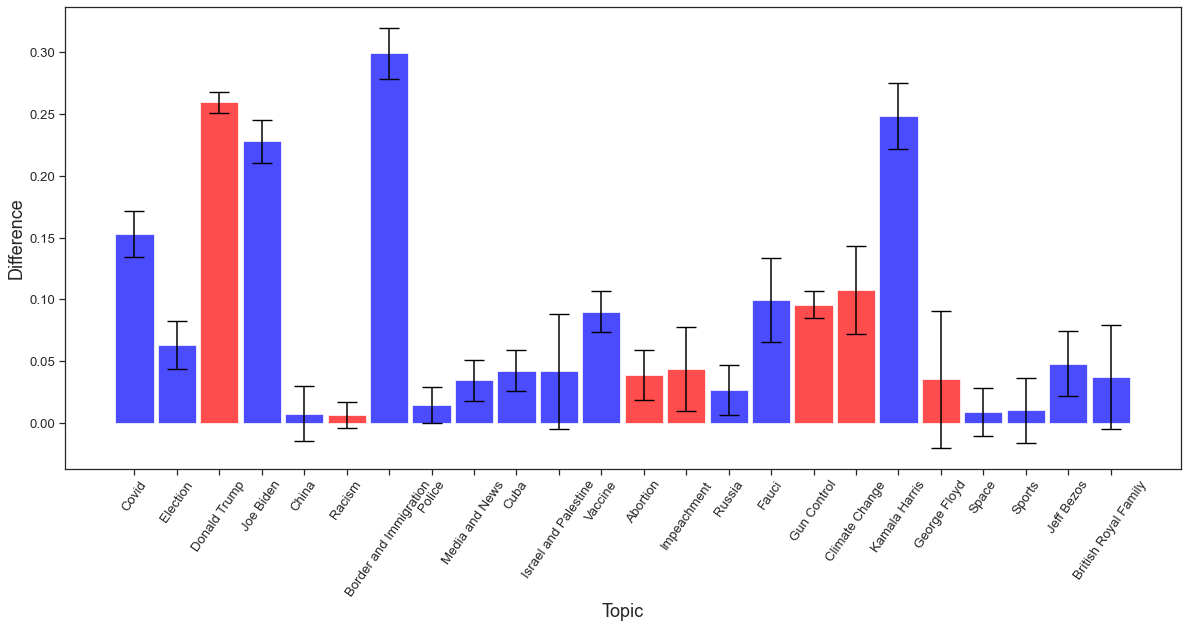

In [202]:
diff = pd.DataFrame(difference)
index = diff.columns.values.tolist()
color  = ['blue','blue','red','blue','blue','red','blue','blue','blue',
         'blue','blue','blue','red','red','blue','blue','red','red','blue','red',
        'blue','blue','blue','blue']
plt.figure(figsize=(20,8.5))
y_std = diff.std(axis=0).tolist()/np.sqrt(diff.shape[0])*1.96    
plt.bar(index, abs(diff.mean(axis=0)).tolist(), width=0.9,yerr = diff.std(axis=0).tolist(),#yerr = y_std,y
        error_kw = {'ecolor' : '0', 'capsize' :10 , 'capthick':1.4},
        alpha=0.7,color=color )
plt.xticks(rotation=55);plt.xlabel('Topic',fontsize=18);plt.ylabel('Difference',fontsize=18);plt.tick_params(bottom=True,left=True) 


In [147]:
#ANOVA for sentiment difference across time
def diff_significant_test(selected_topics):
    for topic in selected_topics:
        reps_sentiment=[];dems_sentiment=[];combined_topics=[]
        
        if topic == 'Covid': #combine covid related topics
            combined_topics = ['Covid','Pandemic','Covid Relief','Coronavirus','Covid Deaths and Cases']
            reps_topic = pd.DataFrame(columns = ["user_id", "Time", "Text", "Topic"])
            dems_topic = pd.DataFrame(columns = ["user_id", "Time", "Text", "Topic"])
            for i in combined_topics:
                if i in topics_assign_reps:
                    index_reps = topics_assign_reps.index(i)-1
                    reps_topic = reps_topic.append(reps[reps['Topic']==index_reps])
                if i in topics_assign_dems:
                    index_dems = topics_assign_dems.index(i)-1
                    dems_topic = dems_topic.append(dems[dems['Topic']==index_dems])
        
        if  topic == 'Election':
            combined_topics = ['Voting','Election','Swing State','Election Fraud','Election Audit','Losing Election']
            reps_topic = pd.DataFrame(columns = ["user_id", "Time", "Text", "Topic"])
            dems_topic = pd.DataFrame(columns = ["user_id", "Time", "Text", "Topic"])
            for i in combined_topics:
                if i in topics_assign_reps:
                    index_reps = topics_assign_reps.index(i)-1
                    reps_topic = reps_topic.append(reps[reps['Topic']==index_reps])
                
                if i in topics_assign_dems:
                    index_dems = topics_assign_dems.index(i)-1
                    dems_topic = dems_topic.append(dems[dems['Topic']==index_dems])
                    
        if (topic!='Covid') and (topic!='Election'):
            index_reps = topics_assign_reps.index(topic)-1
            index_dems = topics_assign_dems.index(topic)-1
            reps_topic = reps[reps['Topic']==index_reps]
            dems_topic = dems[dems['Topic']==index_dems]
            
        reps_sentiment = calculate_sentiment_nltk(reps_topic)
        dems_sentiment = calculate_sentiment_nltk(dems_topic) 
    
        df = pd.DataFrame(reps_sentiment);df.columns =['date','sentiment','lower_ci','higher_ci']
        df2 = pd.DataFrame(dems_sentiment);df2.columns =['date','sentiment','lower_ci','higher_ci']
   #     for i, xi in enumerate(list(dates)): #deal with missing days
   #         if xi not in list(df["date"]):
   #             df.loc[df.shape[0]+1] = {'date':xi,'sentiment':None,'lower_ci':None,'lower_ci':None}
   #         if xi not in list(df2["date"]):
   #             df.loc[df2.shape[0]+1] ={'date':xi,'sentiment':None,'lower_ci':None,'lower_ci':None}

   #     df['date'] = pd.to_datetime(df['date']);df.sort_values(by = 'date');df.reset_index(inplace=True)
   #     df2['date'] = pd.to_datetime(df2['date']);df2.sort_values(by = 'date');df2.reset_index(inplace=True)
    
        df.insert(df.shape[1],'group','dems')
        df['date'] = pd.to_datetime(df['date']).apply(lambda date: date.toordinal())
        df2.insert(df2.shape[1],'group','reps')
        df2['date'] = pd.to_datetime(df2['date']).apply(lambda date: date.toordinal())
        df3 = [df, df2]
        df3 = pd.concat(df3)
        df3.reset_index(drop=True, inplace=True)
        for i in df3['date']:
            if (df3.date == i).sum() != 2:
                df3=df3[~df3['date'].isin([i])]
     #   print(df3)
        print(topic)
        print(AnovaRM(data=df3, depvar='sentiment', subject='date', within=['group'],aggregate_func='mean').fit())
diff_significant_test(selected_topics)

Covid
                 Anova
       F Value   Num DF  Den DF  Pr > F
---------------------------------------
group 17947.4895 1.0000 267.0000 0.0000

Election
                Anova
       F Value  Num DF  Den DF  Pr > F
--------------------------------------
group 2831.8406 1.0000 267.0000 0.0000

Donald Trump
                 Anova
        F Value   Num DF  Den DF  Pr > F
----------------------------------------
group 259258.7152 1.0000 267.0000 0.0000

Joe Biden
                 Anova
       F Value   Num DF  Den DF  Pr > F
---------------------------------------
group 45635.3860 1.0000 267.0000 0.0000

China
               Anova
      F Value Num DF  Den DF  Pr > F
------------------------------------
group 54.9220 1.0000 249.0000 0.0000

Racism
               Anova
      F Value Num DF  Den DF  Pr > F
------------------------------------
group 92.6874 1.0000 267.0000 0.0000

Border and Immigration
                 Anova
       F Value   Num DF  Den DF  Pr > F
----------------------

D:\Anaconda\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Jeff Bezos
                Anova
      F Value  Num DF  Den DF  Pr > F
-------------------------------------
group 824.5496 1.0000 229.0000 0.0000

British Royal Family
                Anova
      F Value  Num DF  Den DF  Pr > F
-------------------------------------
group 190.5497 1.0000 257.0000 0.0000

